NN / Deep Learning / AI

# Deep Learning

## regression

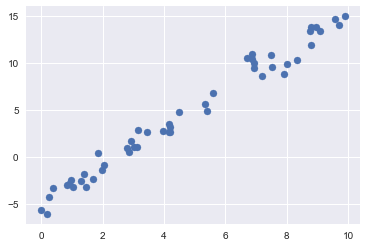

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

###  <b>$\hat{y}$</b>  =  a<sub>1</sub>X<sub>1</sub>   +  b

<img src="y=ab+b.png" width="250" align="left"/>

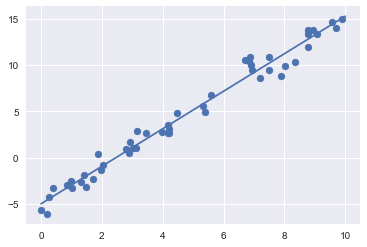

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

###  <b>$\hat{y}$</b>  =  a<sub>1</sub>*X<sub>1</sub>  +  a<sub>2</sub>*X<sub>2</sub> + b

<img src="y=ax+ax+b.png" width="250" align="left"/>

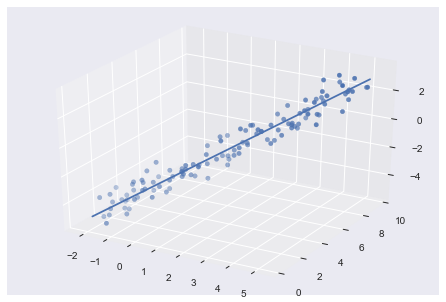

In [17]:
import numpy as np

# Generate some data that lies along a line

x = np.mgrid[-2:5:120j]
y = np.mgrid[1:9:120j]
z = np.mgrid[-5:3:120j]

data = np.concatenate((x[:, np.newaxis], 
                       y[:, np.newaxis], 
                       z[:, np.newaxis]), 
                      axis=1)

# Perturb with some Gaussian noise
data += np.random.normal(size=data.shape) * 0.4

# Calculate the mean of the points, i.e. the 'center' of the cloud
datamean = data.mean(axis=0)

# Do an SVD on the mean-centered data.
uu, dd, vv = np.linalg.svd(data - datamean)

# Now vv[0] contains the first principal component, i.e. the direction
# vector of the 'best fit' line in the least squares sense.

# Now generate some points along this best fit line, for plotting.

# I use -7, 7 since the spread of the data is roughly 14
# and we want it to have mean 0 (like the points we did
# the svd on). Also, it's a straight line, so we only need 2 points.
linepts = vv[0] * np.mgrid[-7:7:2j][:, np.newaxis]

# shift by the mean to get the line in the right place
linepts += datamean

# Verify that everything looks right.

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as m3d

ax = m3d.Axes3D(plt.figure())
ax.scatter3D(*data.T)
ax.plot3D(*linepts.T)
plt.show()

### y_hat = A<sub>1</sub>x<sub>1</sub> + A<sub>2</sub>x<sub>2</sub> + A<sub>3</sub>x<sub>3</sub> ... + B

<img src="multi_var.png" width="200" align="left"/>

## variable interaction

<img src="var_interact.png" width="250" align="left"/>

###  activation_function( a<sub>b</sub>b + a<sub>1</sub>x<sub>1</sub> + a<sub>2</sub>x<sub>2</sub> + a<sub>3</sub>x<sub>3</sub>  ) = h<sub>3</sub>

<img src="activation.png" width="250" align="left"/>

### Z = a<sub>b</sub>b + a<sub>1</sub>x<sub>1</sub> + a<sub>2</sub>x<sub>2</sub> + a<sub>3</sub>x<sub>3</sub>

<img src="relu_sigmoid.png" width="550" align="left"/>
image source: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

## loss functions

## gradient descent

## deep networks

<img src="deep_nets.png" width="950" align="left"/> 
image source: http://www.asimovinstitute.org/neural-network-zoo/

## NN vs DL example

## GPU boosting

## CPU vs GPU example

## Algorithm tuning

# Application

## Object Detection

### NMIST example
### dog breed example

## Algorithm Tuning

## dog breeding example
* side by side pics, same algo with different hypter params, and different probability outcomes

## FMV

* OpenCVvideo into frames example
* (1)  Show side-by-side street level feed with and withOUT boxes around people

## Scaling & Parallelizing 

* IBM Streams - StreamsStudio visual coding and Console for resource management

## Correlation to Geolocation

* (2) show Predator Feed, Streams console, and count stream in terminal

## Parallelizing via Streams

* Multi Predetor Feed Demonstration
### (3) POI Streams
### (4) Streams Console

## Geo location Demonstration
### (5) side-by-side: streaming boxes | map view

# ######### code 

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [144]:
# Load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

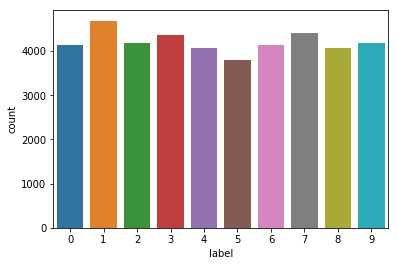

In [3]:
g = sns.countplot(Y_train)

In [4]:
Y_train.value_counts()
X_train.isnull().any().describe()
test.isnull().any().describe()
X_train = X_train / 255.0
test = test / 255.0
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

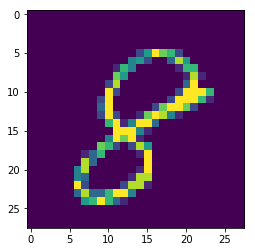

In [6]:
g = plt.imshow(X_train[0][:,:,0])

Train on 26460 samples, validate on 11340 samples
Epoch 1/2
26460/26460 [==============================] - 1s 49us/step - loss: 2.0788 - acc: 0.1835 - val_loss: 1.9502 - val_acc: 0.2131
Epoch 2/2
26460/26460 [==============================] - 1s 36us/step - loss: 1.9121 - acc: 0.2236 - val_loss: 1.8656 - val_acc: 0.2535


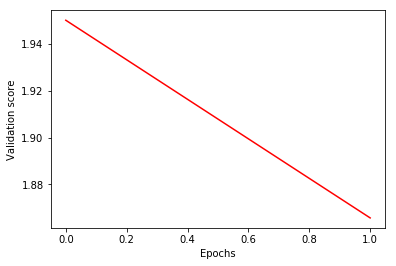

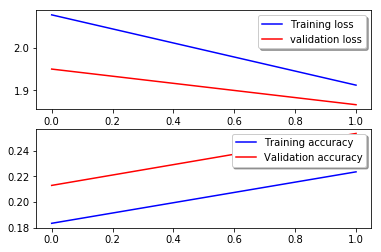

In [126]:
epochs = 2
model_10_ = Sequential()
model_10_.add(Dense(1, activation='relu', input_shape = (784,)))
model_10_.add(Dense(10, activation='softmax'))
model_10_.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])
model_10_training = model_10_.fit(X_train[:,:,:,0].reshape(37800,784), Y_train, epochs=epochs, validation_split=0.3)
# Create the plot
plt.plot(model_10_training.history['val_loss'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(model_10_training.history['loss'], color='b', label="Training loss")
ax[0].plot(model_10_training.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(model_10_training.history['acc'], color='b', label="Training accuracy")
ax[1].plot(model_10_training.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

Train on 26460 samples, validate on 11340 samples
Epoch 1/3
26460/26460 [==============================] - 1s 49us/step - loss: 1.2619 - acc: 0.5812 - val_loss: 0.6921 - val_acc: 0.7940
Epoch 2/3
26460/26460 [==============================] - 1s 42us/step - loss: 0.6190 - acc: 0.8131 - val_loss: 0.5725 - val_acc: 0.8270
Epoch 3/3
26460/26460 [==============================] - 1s 38us/step - loss: 0.5362 - acc: 0.8372 - val_loss: 0.5124 - val_acc: 0.8479


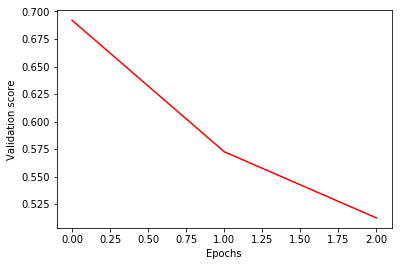

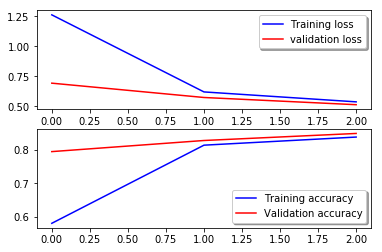

In [129]:
epochs = 3
model_10_ = Sequential()
model_10_.add(Dense(5, activation='relu', input_shape = (784,)))
model_10_.add(Dense(10, activation='softmax'))
model_10_.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])
model_10_training = model_10_.fit(X_train[:,:,:,0].reshape(37800,784), Y_train, epochs=epochs, validation_split=0.3)
# Create the plot
plt.plot(model_10_training.history['val_loss'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(model_10_training.history['loss'], color='b', label="Training loss")
ax[0].plot(model_10_training.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(model_10_training.history['acc'], color='b', label="Training accuracy")
ax[1].plot(model_10_training.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

Train on 26460 samples, validate on 11340 samples
Epoch 1/14
26460/26460 [==============================] - 2s 83us/step - loss: 0.3407 - acc: 0.8965 - val_loss: 0.1598 - val_acc: 0.9526
Epoch 2/14
26460/26460 [==============================] - 2s 66us/step - loss: 0.1433 - acc: 0.9565 - val_loss: 0.1294 - val_acc: 0.9604
Epoch 3/14
26460/26460 [==============================] - 2s 65us/step - loss: 0.0961 - acc: 0.9707 - val_loss: 0.1316 - val_acc: 0.9610
Epoch 4/14
26460/26460 [==============================] - 2s 66us/step - loss: 0.0738 - acc: 0.9765 - val_loss: 0.1164 - val_acc: 0.9640
Epoch 5/14
26460/26460 [==============================] - 2s 67us/step - loss: 0.0555 - acc: 0.9817 - val_loss: 0.1286 - val_acc: 0.9629
Epoch 6/14
26460/26460 [==============================] - 2s 66us/step - loss: 0.0514 - acc: 0.9830 - val_loss: 0.1323 - val_acc: 0.9616
Epoch 7/14
26460/26460 [==============================] - 2s 66us/step - loss: 0.0390 - acc: 0.9872 - val_loss: 0.1193 - val_acc

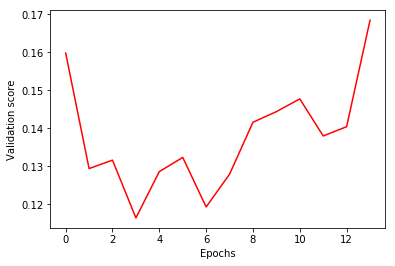

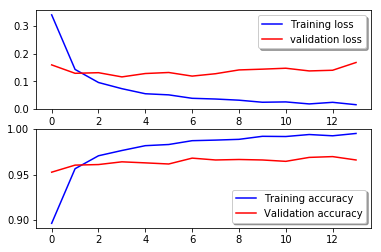

In [132]:
epochs = 14
model_10_ = Sequential()
model_10_.add(Dense(100, activation='relu', input_shape = (784,)))
model_10_.add(Dense(150, activation='relu'))
model_10_.add(Dense(100, activation='relu'))
model_10_.add(Dense(10, activation='softmax'))
model_10_.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

model_10_training = model_10_.fit(X_train[:,:,:,0].reshape(37800,784), Y_train, epochs=epochs, validation_split=0.3)

# Create the plot
plt.plot(model_10_training.history['val_loss'], 'r')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(model_10_training.history['loss'], color='b', label="Training loss")
ax[0].plot(model_10_training.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(model_10_training.history['acc'], color='b', label="Training accuracy")
ax[1].plot(model_10_training.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [133]:
#print(Y_train.shape)
print(Y_train[0,])
print(X_train[0][:,:,0].reshape(784).shape)
predictions = model_10_.predict(X_train[:,:,:,0].reshape(37800,784))

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
(784,)


2793
35007


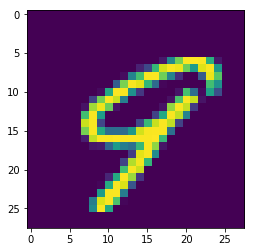

In [131]:
incorrect = []
correct = 0
worst = -1
closest = -1
for i in range(predictions.shape[0]):
    if (np.argmax(predictions[i]) != np.argmax(Y_train[i,])):  
        incorrect.append(i)
        #print(np.argmax(predictions[i]))
        #print(Y_train[i,])
        g = plt.imshow(X_train[i][:,:,0])
        predictions.shape[0]
    else:
        correct = correct + 1
print(len(incorrect))
print(correct)